In [4]:
import pandas as pd
import numpy as np

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 복잡하고 정교한 시각화
import plotly.graph_objs as go
# 간단한 시각화
import plotly.express as px

from plotly.subplots import make_subplots

# 결측값 시각화 라이브러리
import missingno


from sklearn.preprocessing import LabelEncoder

# 생성한 그래프를 표시
%matplotlib inline

In [6]:
# EDA 결과 저장할 경로
PATH = '/.'

In [7]:
f = open(PATH + 'EDA idea.txt', 'w')

In [8]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [12]:
print(train.shape, test.shape)

(256351, 69) (90067, 68)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90067 entries, 0 to 90066
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     90067 non-null  object 
 1   시술 시기 코드               90067 non-null  object 
 2   시술 당시 나이               90067 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  3297 non-null   float64
 4   시술 유형                  90067 non-null  object 
 5   특정 시술 유형               90067 non-null  object 
 6   배란 자극 여부               90067 non-null  int64  
 7   배란 유도 유형               90067 non-null  object 
 8   단일 배아 이식 여부            87891 non-null  float64
 9   착상 전 유전 검사 사용 여부       933 non-null    float64
 10  착상 전 유전 진단 사용 여부       87891 non-null  float64
 11  남성 주 불임 원인             90067 non-null  int64  
 12  남성 부 불임 원인             90067 non-null  int64  
 13  여성 주 불임 원인             90067 non-null  int64  
 14  여성 부 불임 원인             90067 non-null  int64  
 15  부부

<Axes: >

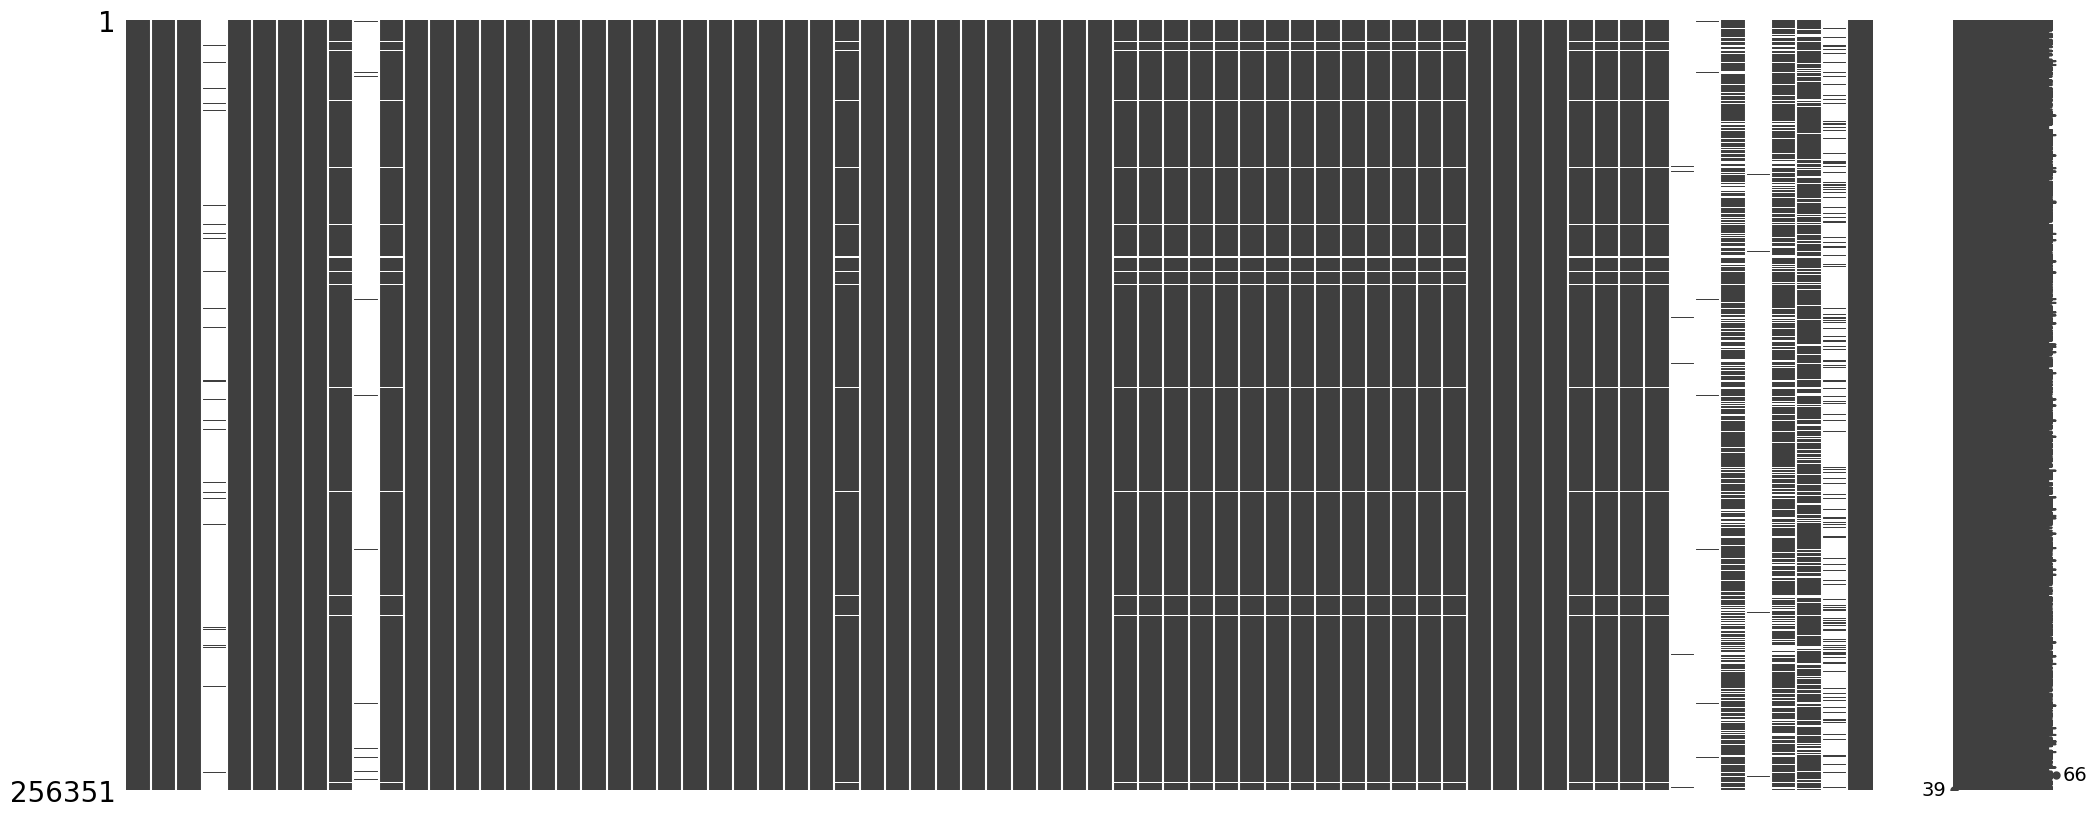

In [17]:
missingno.matrix(train)

In [19]:
print(train.isnull().sum())

ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
                          ...  
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
임신 성공 여부                      0
Length: 69, dtype: int64


In [37]:
selected_columns = [col for col in train.columns if train[col].isnull().sum() == 0]
df_selected = train[selected_columns]

In [43]:
df_test = test[selected_columns[:-1]]
df_test.to_csv('processed_test_1.csv', index=False)

<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:82: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) miss

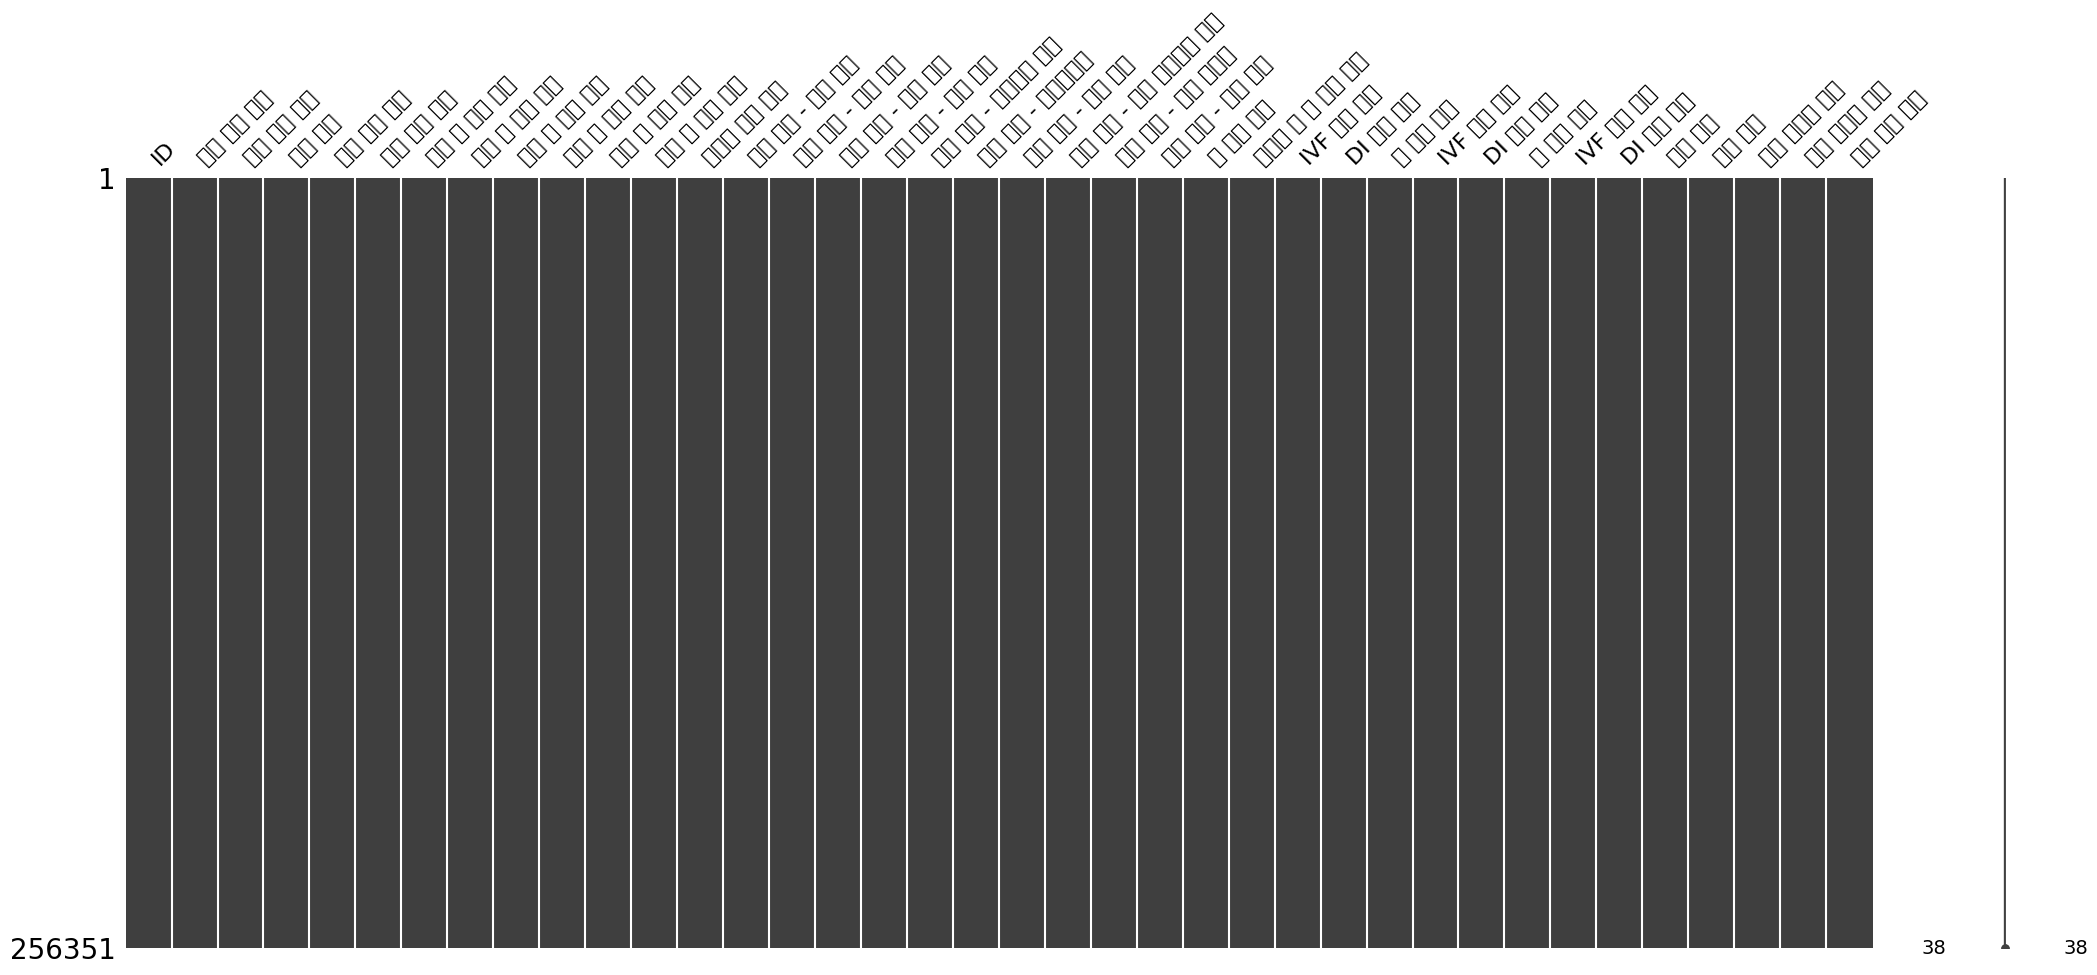

In [40]:
missingno.matrix(df_selected)

In [39]:
df_selected.to_csv('processed_train_1.csv', index=False)